In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read in csv (already transformed)
hosp_df = pd.read_csv('..//..//data/hospitals/LA_Ed_MergedwithHosp19.csv')
hosp_df

,oshpd_id,facility_name,control_type_desc,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,licensed_bed_size,bed_size_cat,Sex_Female,Sex_Male,...,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,DX_Births,ED_Visit,All_Other_Languages,English,Spanish,Target,Label
0,106190017,ALHAMBRA HOSPITAL MEDICAL CENTER,Investor - Individual,100 SOUTH RAYMOND AVENUE,ALHAMBRA,91801,100-149,1,9120,6972,...,1908,672,3391,0,16093,1493,12664,1936,0.049092,1
1,106190045,CATALINA ISLAND MEDICAL CENTER,Non-profit Corporation (incl. Church-related),100 FALLS CANYON ROAD,AVALON,90704,100-149,1,1120,1016,...,182,102,357,0,2136,22,1419,695,0.032069,0
2,106190198,LOS ANGELES COMMUNITY HOSPITAL,Investor - Corporation,4081 EAST OLYMPIC BOULEVARD,LOS ANGELES,90023,100-149,1,2678,2561,...,746,212,515,0,5241,30,3292,1919,0.044683,1
3,106190256,EAST LOS ANGELES DOCTORS HOSPITAL,Investor - Individual,4060 WHITTIER BOULEVARD,LOS ANGELES,90023,100-149,1,6848,6491,...,1445,458,1674,0,13339,0,10533,2806,0.006009,0
4,106190280,ENCINO HOSPITAL MEDICAL CENTER,Non-profit Corporation (incl. Church-related),16237 VENTURA BOULEVARD,ENCINO,91436,100-149,1,4960,4132,...,938,452,1571,0,9092,78,8880,134,0.053656,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,106190555,CEDARS SINAI MEDICAL CENTER,Non-profit Corporation (incl. Church-related),8700 BEVERLY BOULEVARD,LOS ANGELES,90048,500+,5,32617,29616,...,4142,2274,15633,0,62247,2702,56767,2778,0.049922,1
66,106190631,PIH HEALTH HOSPITAL - WHITTIER,Non-profit Corporation (incl. Church-related),12401 WASHINGTON BLVD.,WHITTIER,90602,500+,5,36213,27311,...,6691,2507,18137,0,63526,231,54461,8834,0.014064,0
67,106191228,LAC+USC MEDICAL CENTER,City or County,1200 NORTH STATE STREET,LOS ANGELES,90033,500+,5,55794,69866,...,6579,4785,33707,0,125695,2985,69969,52741,0.050832,1
68,106190197,COMMUNITY HOSPITAL OF HUNTINGTON PARK,Investor - Corporation,2623 EAST SLAUSON AVENUE,HUNTINGTON PARK,90255,50-99,5,21268,18152,...,4819,1691,7998,1,39420,3,37699,1718,0.010492,0


In [3]:
print(hosp_df.shape)

(70, 63)


In [4]:
# Set features. This will also be used as your x values.
selected_features = hosp_df.iloc[:, 8:61]
print(selected_features.shape)

(70, 53)


In [5]:
selected_features

,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,...,DX_Other_Reasons,DX_Perinatal_Disorders,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,DX_Births,ED_Visit,All_Other_Languages,English,Spanish
0,9120,6972,1375,1514,2882,2409,2043,2274,1541,947,...,155,1,1908,672,3391,0,16093,1493,12664,1936
1,1120,1016,209,279,320,279,234,269,259,125,...,9,2,182,102,357,0,2136,22,1419,695
2,2678,2561,621,631,852,778,728,776,537,174,...,335,1,746,212,515,0,5241,30,3292,1919
3,6848,6491,1425,1652,2703,2189,1904,1619,939,390,...,974,3,1445,458,1674,0,13339,0,10533,2806
4,4960,4132,437,603,1781,1742,1400,1329,814,443,...,343,1,938,452,1571,0,9092,78,8880,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,32617,29616,3034,2907,11278,11543,8571,8540,6891,4572,...,1551,38,4142,2274,15633,0,62247,2702,56767,2778
66,36213,27311,7798,6854,9901,8898,7240,6962,5295,4357,...,1807,98,6691,2507,18137,0,63526,231,54461,8834
67,55794,69866,7906,9460,20943,21396,22289,23117,13300,3871,...,4244,51,6579,4785,33707,0,125695,2985,69969,52741
68,21268,18152,5416,5620,7089,5894,5583,4519,2588,1288,...,1259,4,4819,1691,7998,1,39420,3,37699,1718


In [6]:
X = selected_features
y = hosp_df["Label"]
# y = df["Target"].values.reshape(-1, 1)
print(X.shape, y.shape)

(70, 53) (70,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,...,DX_Other_Reasons,DX_Perinatal_Disorders,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,DX_Births,ED_Visit,All_Other_Languages,English,Spanish
57,32728,26678,10966,7519,9748,8300,6935,6388,4161,1770,...,5521,262,7877,2094,12847,0,59408,1559,34868,22981
47,32547,30783,4684,4030,11376,10033,7916,7760,6678,5472,...,1821,59,5098,2532,17080,0,63332,1794,50685,10853
16,17733,13476,2762,2918,5000,4508,3809,4351,3099,2105,...,783,15,3392,1277,7343,0,31209,496,27241,3472
34,11996,10857,971,1146,3450,3152,2970,3206,2914,2288,...,409,13,1580,899,5489,0,22859,869,21145,845
42,23911,20374,3386,3500,9286,7508,5804,6659,4397,1831,...,3875,24,3260,1317,10098,0,44286,56,40217,4013


In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.5961538461538461
Testing Data Score: 0.6111111111111112


In [11]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model, param_grid, verbose=3)

In [12]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.727, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.455, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.727, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=10, gamma=0.0001, score=0.500, total=   0.0s
[CV] C=10, gamma=0.0005 ..............................................
[CV] .................. C=10, gamma=0.0005, score=0.636, total=   0.0s
[CV] C=10, gamma=0.0005 ..............................................
[CV] .................. C=10, gamma=0.0005, score=0.455, total=   0.0s
[CV] C=10, gamma=0.0005 ..............................................
[CV] .................. C=10, gamma=0.0005, score=0.300, total=   0.0s
[CV] C=10, gamma=0.0005 ..............................................
[CV] .................. C=10, gamma=0.0005, score=0.600, total=   0.0s
[CV] C=10, gamma=0.0005 ..............................................
[CV] .................. C=10, gamma=0.0005, score=0.500, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.636, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 1, 'gamma': 0.0001}
0.5963636363636364


In [18]:
correlations_df = hosp_df[["Sex_Female","Sex_Male","Age_01_09","Age_10_19","Age_20_29","Age_30_39","Age_40_49","Age_50_59","Age_60_69","Age_70_79","Age_80_","Age_Under_1","HispanicorLatino","NonHis","Unknown_Eth","Acute_Care","Against_Medical_Advice","Died","Prison_Jail","Psychiatric_Care","Routine","Medi_Cal","Medicare","Other_Payer","Private_Coverage","SelfPay","DX_All_Pregnancies","DX_Blood_Disorders","DX_Cancer","DX_Circulatory_System","DX_Digestive_System","DX_Ear_Disorders","DX_Endocrine_Diseases","DX_Eye_Disorders","DX_Genitourinary_System","DX_Infections","DX_Injuries_Poisonings","DX_Mental_Disorders","DX_Musculoskeletal_System","DX_Nervous_System","DX_Other_Reasons","DX_Perinatal_Disorders","DX_Respiratory_System","DX_Skin_Disorders","DX_Symptoms","ED_Visit","English","Spanish"]].astype(float)

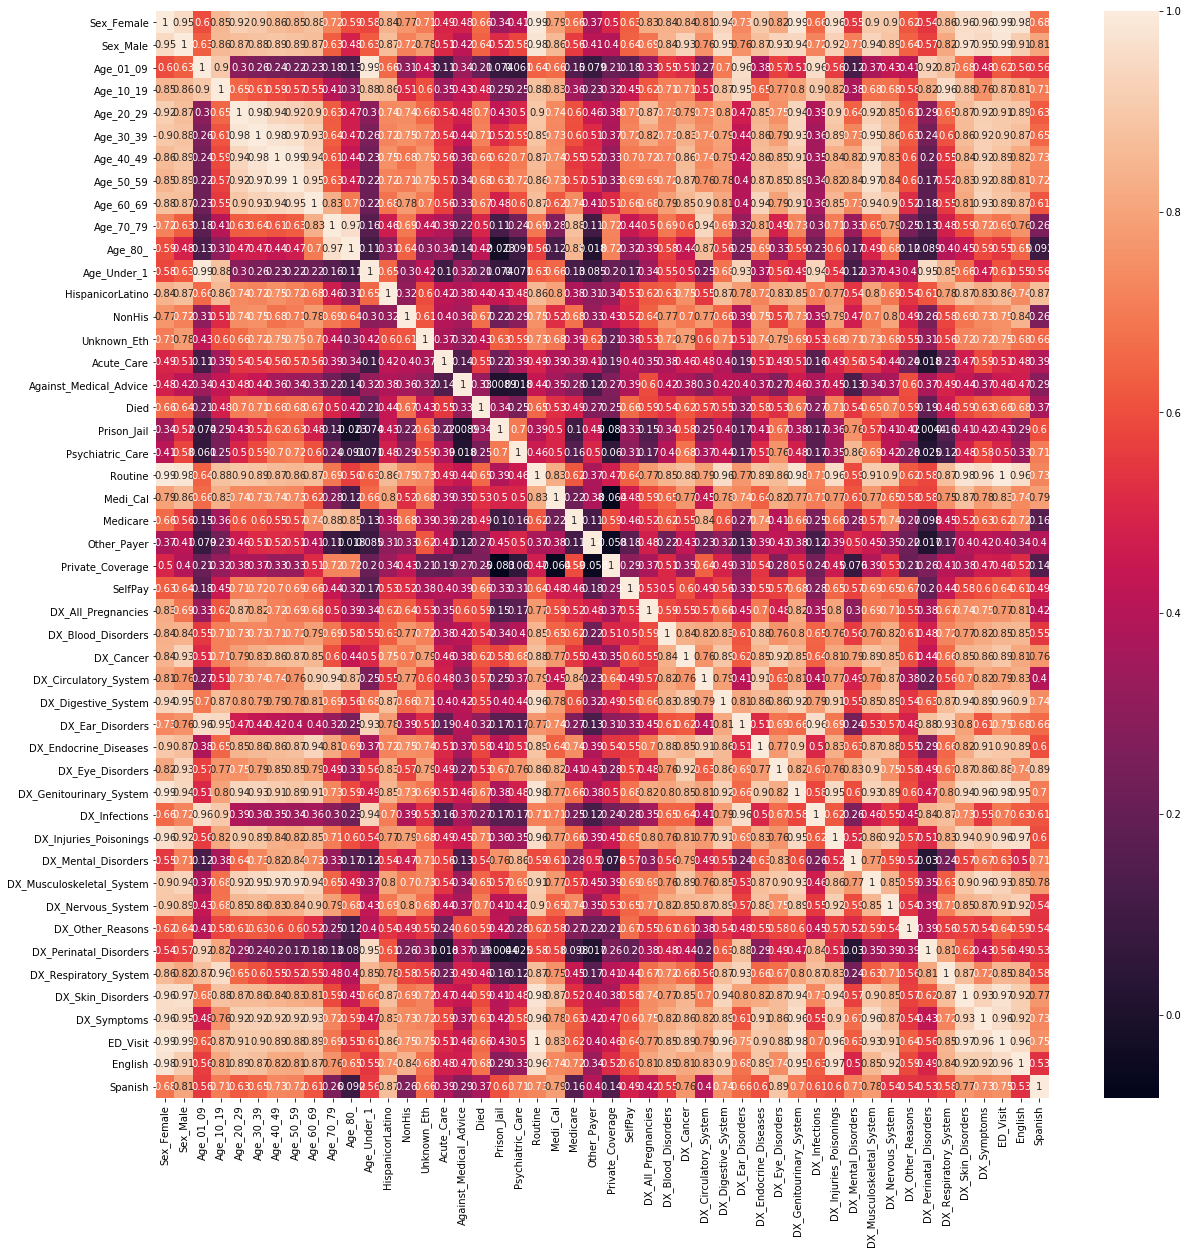

In [19]:
correlations = correlations_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)